# Importing libraries and all datasets

In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [157]:
%matplotlib inline

In [158]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('test_l0Auv8Q.csv')

#Importing all other datasets that we will be merging with the base train and test tables 

first_camp = pd.read_csv('First_Health_Camp_Attended.csv')
second_camp = pd.read_csv('Second_Health_Camp_Attended.csv')
third_camp = pd.read_csv('Third_Health_Camp_Attended.csv')
camp_details = pd.read_csv('Health_Camp_Detail.csv')
patient_profile = pd.read_csv('Patient_Profile.csv')

In [159]:
print('train',train.shape)
print()
print('test',test.shape)
print()
print('first camp',first_camp.shape)
print()
print('second camp',second_camp.shape)
print()
print('third camp',third_camp.shape)
print()
print('camp details',camp_details.shape)
print()
print('patient profile',patient_profile.shape)

train (75278, 8)

test (35249, 8)

first camp (6218, 5)

second camp (7819, 3)

third camp (6515, 4)

camp details (65, 6)

patient profile (37633, 11)


In [160]:
print('train',train.columns.to_list())
print()
print('test',test.columns.to_list())
print()
print('first camp',first_camp.columns.to_list())
print()
print('second camp',second_camp.columns.to_list())
print()
print('third camp',third_camp.columns.to_list())
print()
print('camp details',camp_details.columns.to_list())
print()
print('patient profile',patient_profile.columns.to_list())

train ['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5']

test ['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2', 'Var3', 'Var4', 'Var5']

first camp ['Patient_ID', 'Health_Camp_ID', 'Donation', 'Health_Score', 'Unnamed: 4']

second camp ['Patient_ID', 'Health_Camp_ID', 'Health Score']

third camp ['Patient_ID', 'Health_Camp_ID', 'Number_of_stall_visited', 'Last_Stall_Visited_Number']

camp details ['Health_Camp_ID', 'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2', 'Category3']

patient profile ['Patient_ID', 'Online_Follower', 'LinkedIn_Shared', 'Twitter_Shared', 'Facebook_Shared', 'Income', 'Education_Score', 'Age', 'First_Interaction', 'City_Type', 'Employer_Category']


# Data Pre-Processing

In [161]:
mergeddf = pd.merge(train,first_camp, on=['Patient_ID','Health_Camp_ID'], how='left')
mergeddf2 = pd.merge(mergeddf,second_camp, on=['Patient_ID','Health_Camp_ID'], how='left')
mergeddf3 = pd.merge(mergeddf2,third_camp, on=['Patient_ID','Health_Camp_ID'], how='left')

In [162]:
mergeddf3.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Donation,Health_Score,Unnamed: 4,Health Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,489652,6578,10-Sep-05,4,0,0,0,2,NaN,NaN,NaN,NaN,2.0,1.0
1,507246,6578,18-Aug-05,45,5,0,0,7,NaN,NaN,NaN,NaN,NaN,NaN
2,523729,6534,29-Apr-06,0,0,0,0,0,NaN,NaN,NaN,0.402054,NaN,NaN
3,524931,6535,07-Feb-04,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,521364,6529,28-Feb-06,15,1,0,0,7,NaN,NaN,NaN,0.845597,NaN,NaN


In [163]:
train_target = mergeddf3.copy()

In [164]:
train_target.drop(['Donation','Unnamed: 4','Last_Stall_Visited_Number'],axis=1,inplace=True)

In [165]:
train_target['Outcome'] = np.where((train_target['Health_Score']>0) |
                                 (train_target['Health Score']>0) |
                                 (train_target['Number_of_stall_visited']>0), 
                                 1, 0)

In [166]:
train_target.drop(['Health_Score','Health Score','Number_of_stall_visited'],axis=1,inplace=True)

In [167]:
train_target.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome
0,489652,6578,10-Sep-05,4,0,0,0,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,0
2,523729,6534,29-Apr-06,0,0,0,0,0,1
3,524931,6535,07-Feb-04,0,0,0,0,0,0
4,521364,6529,28-Feb-06,15,1,0,0,7,1


In [168]:
print(train_target['Outcome'].value_counts(),'\n\n',train_target['Outcome'].value_counts(normalize=True))

0    54744
1    20534
Name: Outcome, dtype: int64 

 0    0.727224
1    0.272776
Name: Outcome, dtype: float64


In [169]:
train_target.isna().sum()

Patient_ID             0
Health_Camp_ID         0
Registration_Date    334
Var1                   0
Var2                   0
Var3                   0
Var4                   0
Var5                   0
Outcome                0
dtype: int64

In [170]:
train_target.dropna(axis=0,inplace=True)

In [171]:
train_target.isna().sum()

Patient_ID           0
Health_Camp_ID       0
Registration_Date    0
Var1                 0
Var2                 0
Var3                 0
Var4                 0
Var5                 0
Outcome              0
dtype: int64

**Adding registration month and date column**

In [172]:
#Converting string to date time format
train_target['Registration_Date'] = pd.to_datetime(train_target['Registration_Date'])

In [173]:
train_target['Reg_Month'] = pd.DatetimeIndex(train_target['Registration_Date']).month
train_target['Reg_Day'] = pd.DatetimeIndex(train_target['Registration_Date']).day

In [174]:
train_target.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,Reg_Month,Reg_Day
0,489652,6578,2005-09-10,4,0,0,0,2,1,9,10
1,507246,6578,2005-08-18,45,5,0,0,7,0,8,18
2,523729,6534,2006-04-29,0,0,0,0,0,1,4,29
3,524931,6535,2004-02-07,0,0,0,0,0,0,2,7
4,521364,6529,2006-02-28,15,1,0,0,7,1,2,28


In [175]:
train_target.dtypes

Patient_ID                    int64
Health_Camp_ID                int64
Registration_Date    datetime64[ns]
Var1                          int64
Var2                          int64
Var3                          int64
Var4                          int64
Var5                          int64
Outcome                       int32
Reg_Month                     int64
Reg_Day                       int64
dtype: object

In [176]:
#Converting categorical variables to object type

train_target['Patient_ID'] = train_target['Patient_ID'].astype(dtype='object')
train_target['Health_Camp_ID'] = train_target['Health_Camp_ID'].astype(dtype='object')
train_target['Reg_Month'] = train_target['Reg_Month'].astype(dtype='object')
train_target['Reg_Day'] = train_target['Reg_Day'].astype(dtype='object')

In [177]:
train_target.dtypes

Patient_ID                   object
Health_Camp_ID               object
Registration_Date    datetime64[ns]
Var1                          int64
Var2                          int64
Var3                          int64
Var4                          int64
Var5                          int64
Outcome                       int32
Reg_Month                    object
Reg_Day                      object
dtype: object

**Adding variables from the camp details dataset**

In [178]:
final_train = pd.merge(train_target,camp_details,on='Health_Camp_ID',how='left')

In [179]:
final_train

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,Reg_Month,Reg_Day,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,489652,6578,2005-09-10,4,0,0,0,2,1,9,10,16-Aug-05,14-Oct-05,Third,G,2
1,507246,6578,2005-08-18,45,5,0,0,7,0,8,18,16-Aug-05,14-Oct-05,Third,G,2
2,523729,6534,2006-04-29,0,0,0,0,0,1,4,29,17-Oct-05,07-Nov-07,Second,A,2
3,524931,6535,2004-02-07,0,0,0,0,0,0,2,7,01-Feb-04,18-Feb-04,First,E,2
4,521364,6529,2006-02-28,15,1,0,0,7,1,2,28,30-Mar-06,03-Apr-06,Second,A,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74939,500969,6539,2005-01-03,0,0,0,0,0,0,1,3,07-Aug-04,12-Feb-05,First,F,2
74940,511952,6528,2006-02-13,0,0,0,0,0,1,2,13,10-Feb-06,25-Apr-06,Third,G,2
74941,521236,6554,2005-05-24,0,0,0,0,0,1,5,24,19-Jun-05,01-Jul-05,First,B,2
74942,518817,6580,2004-12-22,0,0,0,0,0,0,12,22,22-Dec-04,06-Jan-05,First,E,2


In [180]:
#Converting camp start and end dates to datetime object

final_train['Camp_Start_Date'] = pd.to_datetime(final_train['Camp_Start_Date'])
final_train['Camp_End_Date'] = pd.to_datetime(final_train['Camp_End_Date'])

In [181]:
final_train['Campstart_Month'] = pd.DatetimeIndex(final_train['Camp_Start_Date']).month.astype('object')
final_train['Campstart_Day'] = pd.DatetimeIndex(final_train['Camp_Start_Date']).day.astype('object')

In [182]:
final_train['Campend_Month'] = pd.DatetimeIndex(final_train['Camp_End_Date']).month.astype('object')
final_train['Campend_Day'] = pd.DatetimeIndex(final_train['Camp_End_Date']).day.astype('object')

In [183]:
# final_train['Reg_Camp_gap'] = final_train['Camp_End_Date'] - final_train['Registration_Date']

In [184]:
final_train.describe()

,Var1,Var2,Var3,Var4,Var5,Outcome,Category3
count,74944.000000,74944.000000,74944.000000,74944.000000,74944.000000,74944.000000,74944.000000
mean,0.783625,0.234975,0.000374,0.022137,0.245317,0.271376,1.994569
std,7.571891,3.748142,0.019326,0.198344,1.205674,0.444673,0.073494
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,288.000000,156.000000,1.000000,4.000000,31.000000,1.000000,2.000000


In [185]:
final_train.groupby(by='Outcome').mean()

,Var1,Var2,Var3,Var4,Var5,Category3
Outcome,,,,,,
0,0.574113,0.158664,0.000201,0.018203,0.197927,1.994451
1,1.346150,0.439866,0.000836,0.032697,0.372554,1.994886


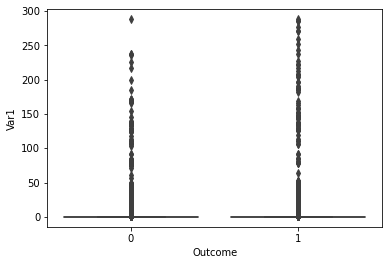

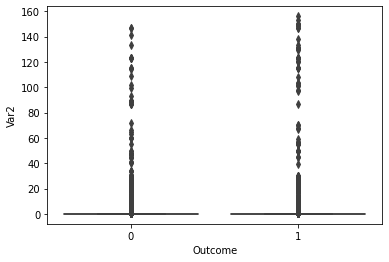

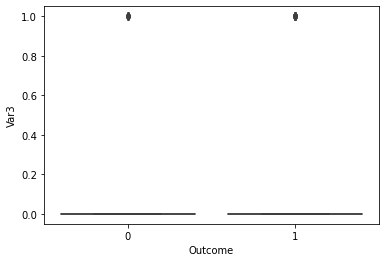

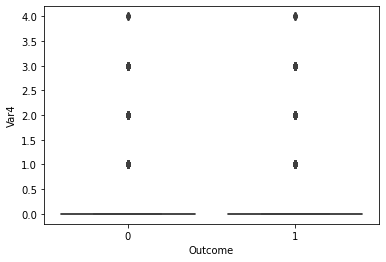

In [186]:
for i in ['Var1','Var2','Var3','Var4']:
    sns.boxplot(x='Outcome',y=i,data=final_train)
    plt.show()

In [187]:
for i in ['Var1','Var2','Var3','Var4']:
    print(final_train[i].skew())

21.92813564151691
28.67491485537422
51.70762834354355
10.760709109861883


Our anonymized variables are largely skewed. Hence, we will have to compulsorily apply a log transformation before we proceed with model training 

**Roadmap for pre-processing:** 
Here, we have to merge all the tables in such a way that our train and test tables will respectively have the following columns -
1. Data Merging: Patient ID can be used as the primary key to join all the tables together, except to extract camp details we will have to use the camp ID as the foreign key
    - Patient Profile - All variables from the patient profile dataframe
    - First camp details - yes/no, Donation, camp start date, camp end date, category of the camp, Health_score (target variable)
    - Second camp details - yes/no, camp start date, camp end date, category of the camp, Health_score (target variable)
    - Third camp details - yes/no, last stall visited number, number of stalls visited (target variable)
    
2. Treating null values

3. Treating outliers 

and so on..

# Data Transformation

In [188]:
final_train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Outcome,Reg_Month,Reg_Day,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Campstart_Month,Campstart_Day,Campend_Month,Campend_Day
0,489652,6578,2005-09-10,4,0,0,0,2,1,9,10,2005-08-16,2005-10-14,Third,G,2,8,16,10,14
1,507246,6578,2005-08-18,45,5,0,0,7,0,8,18,2005-08-16,2005-10-14,Third,G,2,8,16,10,14
2,523729,6534,2006-04-29,0,0,0,0,0,1,4,29,2005-10-17,2007-11-07,Second,A,2,10,17,11,7
3,524931,6535,2004-02-07,0,0,0,0,0,0,2,7,2004-02-01,2004-02-18,First,E,2,2,1,2,18
4,521364,6529,2006-02-28,15,1,0,0,7,1,2,28,2006-03-30,2006-04-03,Second,A,2,3,30,4,3


In [189]:
final_train.columns

Index(['Patient_ID', 'Health_Camp_ID', 'Registration_Date', 'Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Outcome', 'Reg_Month', 'Reg_Day',
       'Camp_Start_Date', 'Camp_End_Date', 'Category1', 'Category2',
       'Category3', 'Campstart_Month', 'Campstart_Day', 'Campend_Month',
       'Campend_Day'],
      dtype='object')

In [213]:
X = final_train[['Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Reg_Month', 'Reg_Day']]

# X = final_train[['Var1', 'Var2',
#        'Var3', 'Var4', 'Var5', 'Reg_Month', 'Reg_Day', 'Category1', 'Category2',
#        'Category3', 'Campstart_Month', 'Campstart_Day', 'Campend_Month',
#        'Campend_Day']]
y = final_train['Outcome']

In [214]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Reg_Month,Reg_Day
0,4,0,0,0,2,9,10
1,45,5,0,0,7,8,18
2,0,0,0,0,0,4,29
3,0,0,0,0,0,2,7
4,15,1,0,0,7,2,28


In [215]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74944 entries, 0 to 74943
Data columns (total 7 columns):
Var1         74944 non-null int64
Var2         74944 non-null int64
Var3         74944 non-null int64
Var4         74944 non-null int64
Var5         74944 non-null int64
Reg_Month    74944 non-null object
Reg_Day      74944 non-null object
dtypes: int64(5), object(2)
memory usage: 7.1+ MB


In [193]:
# X['Category3'] = X['Category3'].astype('object')

In [216]:
X.dtypes

Var1          int64
Var2          int64
Var3          int64
Var4          int64
Var5          int64
Reg_Month    object
Reg_Day      object
dtype: object

In [217]:
X = pd.get_dummies(X,drop_first=True)

In [218]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Reg_Month_2,Reg_Month_3,Reg_Month_4,Reg_Month_5,Reg_Month_6,...,Reg_Day_22,Reg_Day_23,Reg_Day_24,Reg_Day_25,Reg_Day_26,Reg_Day_27,Reg_Day_28,Reg_Day_29,Reg_Day_30,Reg_Day_31
0,4,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,45,5,0,0,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,1,0,0,7,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [219]:
num_cols = X.select_dtypes(include='int64').columns.to_list()
num_cols

['Var1', 'Var2', 'Var3', 'Var4', 'Var5']

In [220]:
#Log transformation
for i in num_cols:
    X[i] = np.log(X[i] + 1)

In [221]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Reg_Month_2,Reg_Month_3,Reg_Month_4,Reg_Month_5,Reg_Month_6,...,Reg_Day_22,Reg_Day_23,Reg_Day_24,Reg_Day_25,Reg_Day_26,Reg_Day_27,Reg_Day_28,Reg_Day_29,Reg_Day_30,Reg_Day_31
0,1.609438,0.000000,0.0,0.0,1.098612,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.828641,1.791759,0.0,0.0,2.079442,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.000000,0.000000,0.0,0.0,0.000000,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.000000,0.000000,0.0,0.0,0.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.772589,0.693147,0.0,0.0,2.079442,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [222]:
#Normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[num_cols] = sc.fit_transform(X[num_cols])

In [223]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Reg_Month_2,Reg_Month_3,Reg_Month_4,Reg_Month_5,Reg_Month_6,...,Reg_Day_22,Reg_Day_23,Reg_Day_24,Reg_Day_25,Reg_Day_26,Reg_Day_27,Reg_Day_28,Reg_Day_29,Reg_Day_30,Reg_Day_31
0,2.763433,-0.150440,-0.019333,-0.11865,2.723248,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6.966827,5.979497,-0.019333,-0.11865,5.391016,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.285004,-0.150440,-0.019333,-0.11865,-0.264880,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.285004,-0.150440,-0.019333,-0.11865,-0.264880,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.966557,2.220943,-0.019333,-0.11865,5.391016,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### RFC

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=101)

In [225]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=101)

In [226]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=101)

In [227]:
y_pred = rf.predict_proba(X_val)

In [228]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val,y_pred[:,1])

0.6728112915475729

### XGBC

In [229]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=101)

In [230]:
xg.fit(X_train,y_train)
y_pred = xg.predict_proba(X_val)

In [231]:
roc_auc_score(y_val,y_pred[:,1])

0.6696190276722924

# Sample Submission

In [232]:
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,505701,6548,21-May-06,1,0,0,0,2
1,500633,6584,02-Jun-06,0,0,0,0,0
2,506945,6582,10-Aug-06,0,0,0,0,0
3,497447,6551,27-Aug-06,0,0,0,0,0
4,496446,6533,19-Sep-06,0,0,0,0,0


In [236]:
#Converting string to date time format
test['Registration_Date'] = pd.to_datetime(test['Registration_Date'])

test['Reg_Month'] = pd.DatetimeIndex(test['Registration_Date']).month.astype('object')
test['Reg_Day'] = pd.DatetimeIndex(test['Registration_Date']).day.astype('object')

# #Adding camp related variables to the test set
# final_test = pd.merge(test,camp_details,on='Health_Camp_ID',how='left')

# #Converting camp start and end dates to datetime object
# final_test['Camp_Start_Date'] = pd.to_datetime(final_test['Camp_Start_Date'])
# final_test['Camp_End_Date'] = pd.to_datetime(final_test['Camp_End_Date'])

# final_test['Campstart_Month'] = pd.DatetimeIndex(final_test['Camp_Start_Date']).month.astype('object')
# final_test['Campstart_Day'] = pd.DatetimeIndex(final_test['Camp_Start_Date']).day.astype('object')

# final_test['Campend_Month'] = pd.DatetimeIndex(final_test['Camp_End_Date']).month.astype('object')
# final_test['Campend_Day'] = pd.DatetimeIndex(final_test['Camp_End_Date']).day.astype('object')

X_test = test[['Var1', 'Var2',
       'Var3', 'Var4', 'Var5', 'Reg_Month', 'Reg_Day']]


# X_test = final_test[['Var1', 'Var2',
#        'Var3', 'Var4', 'Var5', 'Reg_Month', 'Reg_Day', 'Category1', 'Category2',
#        'Category3', 'Campstart_Month', 'Campstart_Day', 'Campend_Month',
#        'Campend_Day']]

# X_test['Category3'] = X_test['Category3'].astype('object')

X_test = pd.get_dummies(X_test,drop_first=True)

#Log transformation
for i in num_cols:
    X_test[i] = np.log(X_test[i] + 1)
    
#Normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [237]:
X_test.shape

(35249, 46)

In [238]:
X.shape

(74944, 46)

In [ ]:
# missing_cols = set(X.columns ) - set(X_test.columns )

In [ ]:
# for c in missing_cols:
#     X_test[c] = 0

In [239]:
X_test = X_test[X.columns] #keeping the order of columns same for X and X_test

In [240]:
y_sample_pred = rf.predict_proba(X_test)[:,:1]

In [241]:
y_sample_pred

array([[0.56717677],
       [0.72391112],
       [0.72063382],
       ...,
       [0.57572771],
       [0.80273732],
       [0.58      ]])

In [242]:
y_sample_pred = pd.DataFrame(y_sample_pred,columns=['Outcome'])

In [243]:
y_sample_pred

,Outcome
0,0.567177
1,0.723911
2,0.720634
3,0.637436
4,0.569610
...,...
35244,0.410000
35245,0.896958
35246,0.575728
35247,0.802737


In [244]:
y_sample_pred['Patient_ID'] = test['Patient_ID']

In [245]:
y_sample_pred['Health_Camp_ID'] = test['Health_Camp_ID']

In [246]:
y_sample_pred

,Outcome,Patient_ID,Health_Camp_ID
0,0.567177,505701,6548
1,0.723911,500633,6584
2,0.720634,506945,6582
3,0.637436,497447,6551
4,0.569610,496446,6533
...,...,...,...
35244,0.410000,507261,6525
35245,0.896958,513607,6551
35246,0.575728,498160,6584
35247,0.802737,502444,6567


In [247]:
submission_v1 = y_sample_pred[['Patient_ID','Health_Camp_ID','Outcome']]

In [248]:
submission_v1

,Patient_ID,Health_Camp_ID,Outcome
0,505701,6548,0.567177
1,500633,6584,0.723911
2,506945,6582,0.720634
3,497447,6551,0.637436
4,496446,6533,0.569610
...,...,...,...
35244,507261,6525,0.410000
35245,513607,6551,0.896958
35246,498160,6584,0.575728
35247,502444,6567,0.802737


In [249]:
submission_v1.to_csv('sample_submission.csv',index=False)